# Alphalens Example Tear Sheet

Alphalens is designed to aid in the analysis of "alpha factors," data transformations that are used to predict future price movements of financial instruments. Alpha factors take the form of a single value for each asset on each day. The dimension of these values is not necessarily important. We evaluate an alpha factor by considering daily factor values relative to one another. 

It is important to note the difference between an alpha factor and a trading algorithm. A trading algorithm uses an alpha factor, or combination of alpha factors to generate trades.  Trading algorithms cover execution and risk constraints: the business of turning predictions into profits. Alpha factors, on the other hand, are focused soley on making predictions. This difference in scope lends itself to a difference in the methodologies used to evaluate alpha factors and trading algorithms. Alphalens does not contain analyses of things like transaction costs, capacity, or portfolio construction. Those interested in more implementation specific analyses are encouaged to check out pyfolio (https://github.com/quantopian/pyfolio), a library specifically geared towards the evaluation of trading algorithms. 





In [1]:
%pylab inline --no-import-all
import alphalens
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In this example, we'll analyze a basic momentum factor computed for a universe of 500 large cap stocks. Below is a simple mapping of tickers to sectors.

In [2]:
ticker_sector = {'A': 4, 'AA': 7, 'AAL': 5, 'AAP': 0, 'AAPL': 6, 'ABBV': 4, 'ABC': 4, 'ABT': 4, 'ACN': 6, 'ADBE': 6, 
'ADI': 6, 'ADM': 1, 'ADP': 6, 'ADS': 6, 'ADSK': 6, 'AEE': 9, 'AEP': 9, 'AES': 9, 'AET': 4, 'AFL': 3, 
'AGN': 4, 'AIG': 3, 'AIV': 3, 'AIZ': 3, 'AJG': 3, 'AKAM': 6, 'ALK': 5, 'ALL': 3, 'ALLE': 5, 'ALXN': 4,
'AMAT': 6, 'AME': 5, 'AMG': 3, 'AMGN': 4, 'AMP': 3, 'AMT': 3, 'AMZN': 0, 'AN': 0, 'ANTM': 4, 'AON': 3,
'APA': 2, 'APC': 2, 'APD': 7, 'APH': 5, 'ATVI': 6, 'AVB': 3, 'AVGO': 6, 'AVY': 7, 'AWK': 9, 'AXP': 3,
'AYI': 5, 'AZO': 0, 'BA': 5, 'BAC': 3, 'BAX': 4, 'BBBY': 0, 'BBT': 3, 'BBY': 0, 'BCR': 4, 'BDX': 4,
'BEN': 3, 'BF-B': 1, 'BHI': 2, 'BIIB': 4, 'BK': 3, 'BLK': 3, 'BLL': 7, 'BMY': 4, 'BRK-B': 3, 'BSX': 4,
'BWA': 0, 'BXP': 3, 'C': 3, 'CA': 6, 'CAG': 1, 'CAH': 4, 'CAT': 5, 'CB': 3, 'CBG': 3, 'CBS': 0, 
'CCI': 3, 'CCL': 0, 'CELG': 4, 'CERN': 4, 'CF': 7, 'CFG': 3, 'CHD': 1, 'CHK': 2, 'CHRW': 5, 'CI': 4,
'CINF': 3, 'CL': 1, 'CLX': 1, 'CMA': 3, 'CMCSA': 0, 'CME': 3, 'CMG': 0, 'CMI': 5, 'CMS': 9, 'CNC': 4,
'CNP': 9, 'COF': 3, 'COG': 2, 'COH': 0, 'COL': 5, 'COP': 2, 'COST': 1, 'CPB': 1, 'CPGX': 2, 'CRM': 6,
'CSCO': 6, 'CSRA': 6, 'CSX': 5, 'CTAS': 5, 'CTL': 8, 'CTSH': 6, 'CTXS': 6, 'CVS': 1, 'CVX': 2, 
'CXO': 2, 'D': 9, 'DAL': 5, 'DD': 7, 'DE': 5, 'DFS': 3, 'DG': 0, 'DGX': 4, 'DHI': 0, 'DHR': 5, 
'DIS': 0, 'DISCA': 0, 'DISCK': 0, 'DLPH': 0, 'DLR': 3, 'DLTR': 0, 'DNB': 5, 'DO': 2, 'DOV': 5, 
'DOW': 7, 'DPS': 1, 'DRI': 0, 'DTE': 9, 'DUK': 9, 'DVA': 4, 'DVN': 2, 'EA': 6, 'EBAY': 6, 'ECL': 7,
'ED': 9, 'EFX': 3, 'EIX': 9, 'EL': 1, 'EMC': 6, 'EMN': 7, 'EMR': 5, 'ENDP': 4, 'EOG': 2, 'EQIX': 6,
'EQR': 3, 'EQT': 2, 'ES': 9, 'ESRX': 4, 'ESS': 3, 'ETFC': 3, 'ETN': 5, 'ETR': 9, 'EW': 4, 'EXC': 9,
'EXPD': 5, 'EXPE': 0, 'EXR': 3, 'F': 0, 'FAST': 5, 'FB': 6, 'FBHS': 5, 'FCX': 7, 'FDX': 5, 'FE': 9, 
'FFIV': 6, 'FIS': 6, 'FISV': 6, 'FITB': 3, 'FL': 0, 'FLIR': 5, 'FLR': 5, 'FLS': 5, 'FMC': 7, 
'FOX': 0, 'FOXA': 0, 'FRT': 3, 'FSLR': 6, 'FTI': 2, 'FTR': 8, 'GAS': 9, 'GD': 5, 'GE': 5, 'GGP': 3,
'GILD': 4, 'GIS': 1, 'GLW': 5, 'GM': 0, 'GOOG': 6, 'GOOGL': 6, 'GPC': 0, 'GPN': 6, 'GPS': 0, 
'GRMN': 0, 'GS': 3, 'GT': 0, 'GWW': 5, 'HAL': 2, 'HAR': 0, 'HAS': 0, 'HBAN': 3, 'HBI': 0, 'HCA': 4,
'HCN': 3, 'HCP': 3, 'HD': 0, 'HES': 2, 'HIG': 3, 'HOG': 0, 'HOLX': 4, 'HON': 5, 'HOT': 0, 'HP': 2,
'HPE': 6, 'HPQ': 6, 'HRB': 3, 'HRL': 1, 'HRS': 6, 'HSIC': 4, 'HST': 3, 'HSY': 1, 'HUM': 4, 'IBM': 6,
'ICE': 3, 'IFF': 7, 'ILMN': 4, 'INTC': 6, 'INTU': 6, 'IP': 7, 'IPG': 0, 'IR': 5, 'IRM': 5, 
'ISRG': 4, 'ITW': 5, 'IVZ': 3, 'JBHT': 5, 'JCI': 0, 'JEC': 5, 'JNJ': 4, 'JNPR': 6, 'JPM': 3, 
'JWN': 0, 'K': 1, 'KEY': 3, 'KHC': 1, 'KIM': 3, 'KLAC': 6, 'KMB': 1, 'KMI': 2, 'KMX': 0, 'KO': 1,
'KORS': 0, 'KR': 1, 'KSS': 0, 'KSU': 5, 'L': 3, 'LB': 0, 'LEG': 5, 'LEN': 0, 'LH': 4, 'LKQ': 0, 
'LLL': 5, 'LLTC': 6, 'LLY': 4, 'LM': 3, 'LMT': 5, 'LNC': 3, 'LOW': 0, 'LRCX': 6, 'LUK': 3, 'LUV': 5,
'LVLT': 8, 'LYB': 7, 'M': 0, 'MA': 6, 'MAC': 3, 'MAR': 0, 'MAS': 5, 'MAT': 0, 'MCD': 0, 'MCHP': 6, 
'MCK': 4, 'MCO': 3, 'MDLZ': 1, 'MDT': 4, 'MET': 3, 'MHK': 0, 'MJN': 1, 'MKC': 1, 'MLM': 7, 'MMC': 3, 
'MMM': 5, 'MNK': 4, 'MNST': 1, 'MO': 1, 'MON': 7, 'MOS': 7, 'MPC': 2, 'MRK': 4, 'MRO': 2, 'MS': 3, 
'MSFT': 6, 'MSI': 6, 'MTB': 3, 'MU': 6, 'MUR': 2, 'MYL': 4, 'NAVI': 3, 'NBL': 2, 'NDAQ': 3, 'NEE': 9,
'NEM': 7, 'NFLX': 6, 'NFX': 2, 'NI': 9, 'NKE': 0, 'NLSN': 5, 'NOC': 5, 'NOV': 2, 'NRG': 9, 'NSC': 5, 
'NTAP': 6, 'NTRS': 3, 'NUE': 7, 'NVDA': 6, 'NWL': 0, 'NWS': 0, 'NWSA': 0, 'O': 3, 'OI': 7, 'OKE': 2, 
'OMC': 0, 'ORCL': 6, 'ORLY': 0, 'OXY': 2, 'PAYX': 6, 'PBCT': 3, 'PBI': 5, 'PCAR': 5, 'PCG': 9, 'PCLN': 0, 
'PDCO': 4, 'PEG': 9, 'PEP': 1, 'PFE': 4, 'PFG': 3, 'PG': 1, 'PGR': 3, 'PH': 5, 
'PHM': 0, 'PKI': 4, 'PLD': 3, 'PM': 1, 'PNC': 3, 'PNR': 5, 'PNW': 9, 'PPG': 7, 
'PPL': 9, 'PRGO': 4, 'PRU': 3, 'PSA': 3, 'PSX': 2, 'PVH': 0, 'PWR': 5, 'PX': 7, 'PXD': 2, 
'PYPL': 6, 'QCOM': 6, 'QRVO': 6, 'R': 5, 'RAI': 1, 'RCL': 0, 'REGN': 4, 'RF': 3, 'RHI': 5, 'RHT': 6, 
'RIG': 2, 'RL': 0, 'ROK': 5, 'ROP': 5, 'ROST': 0, 'RRC': 2, 'RSG': 5, 'RTN': 5, 'SBUX': 0, 'SCG': 9,
'SCHW': 3, 'SE': 2, 'SEE': 7, 'SHW': 7, 'SIG': 0, 'SJM': 1, 'SLB': 2, 'SLG': 3, 'SNA': 0, 'SNI': 0,
'SO': 9, 'SPG': 3, 'SPGI': 3, 'SPLS': 0, 'SRCL': 5, 'SRE': 9, 'STI': 3, 'STJ': 4, 'STT': 3, 'STX': 6,
'STZ': 1, 'SWK': 0, 'SWKS': 6, 'SWN': 2, 'SYF': 3, 'SYK': 4, 'SYMC': 6, 'SYY': 1, 'T': 8, 'TAP': 1,
'TDC': 6, 'TDG': 5, 'TE': 9, 'TEL': 6, 'TGNA': 0, 'TGT': 0, 'TIF': 0, 'TJX': 0, 'TMK': 3, 'TMO': 4,
'TRIP': 0, 'TROW': 3, 'TRV': 3, 'TSCO': 0, 'TSN': 1, 'TSO': 2, 'TSS': 6, 'TWX': 0, 'TXN': 6, 'TXT': 5,
'TYC': 5, 'UA': 0, 'UAL': 5, 'UDR': 3, 'UHS': 4, 'ULTA': 0, 'UNH': 4, 'UNM': 3, 'UNP': 5, 'UPS': 5,
'URBN': 0, 'URI': 5, 'USB': 3, 'UTX': 5, 'V': 6, 'VAR': 4, 'VFC': 0, 'VIAB': 0, 'VLO': 2, 'VMC': 7, 
'VNO': 3, 'VRSK': 5, 'VRSN': 6, 'VRTX': 4, 'VTR': 3, 'VZ': 8, 'WAT': 4, 'WBA': 1, 'WDC': 6, 'WEC': 9,
'WFC': 3, 'WFM': 1, 'WHR': 0, 'WLTW': 3, 'WM': 5, 'WMB': 2, 'WMT': 1, 'WRK': 7, 'WU': 6, 'WY': 3, 
'WYN': 0, 'WYNN': 0, 'XEC': 2, 'XEL': 9, 'XL': 3, 'XLNX': 6, 'XOM': 2, 'XRAY': 4, 'XRX': 6, 'XYL': 5,
 'YHOO': 6, 'YUM': 0, 'ZBH': 4, 'ZION': 3, 'ZTS': 4}

In [3]:
import pandas_datareader.data as web
pan = web.DataReader(ticker_sector.keys(), "yahoo", '2014-12-01')

/Users/jameschristopher/anaconda/lib/python2.7/site-packages/pandas_datareader/base.py:192: SymbolWarning: Failed to read symbol: 'CPGX', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/jameschristopher/anaconda/lib/python2.7/site-packages/pandas_datareader/base.py:192: SymbolWarning: Failed to read symbol: 'GAS', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/jameschristopher/anaconda/lib/python2.7/site-packages/pandas_datareader/base.py:192: SymbolWarning: Failed to read symbol: 'TE', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [4]:
pan = pan.transpose(2,1,0)

In [5]:
momentum_factor = (pan.loc[:,:,'Close'] - pan.loc[:,:,'Open']) / (pan.loc[:,:,'High'] - pan.loc[:,:,'Low'])
momentum_factor = momentum_factor.iloc[:-11]

# To be conservative, we say that we observe a factor before trading starts the next morning. 
momentum_factor = momentum_factor.shift().iloc[1:]

momentum_factor = momentum_factor.stack()
momentum_factor.index = momentum_factor.index.set_names(['date', 'asset'])

In [6]:
momentum_factor.head()

date        asset
2014-12-02  A       -0.956523
            AA      -0.619050
            AAL     -0.530805
            AAP      0.402441
            AAPL    -0.468671
dtype: float64

The pricing data passed to alphalens should reflect the next available price after a factor value was observed at a given timestamp. The price must not be included in the calculation of the factor for that time. Always double check to ensure you are not introducing lookahead bias to your study.

In our example, before trading starts on 2014-12-2, we observe yesterday, 2014-12-1's factor value. The price we should pass to alphalens is the next available price after that factor observation: the open price on 2014-12-2.

In [7]:
pricing = pan.loc[:,:,'Open'].iloc[1:]
pricing.head()

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-02,41.599998,17.120001,48.119999,146.710007,113.500000,68.879997,90.930000,44.680000,85.849998,74.000000,...,45.189999,92.320000,54.880001,13.80,38.500000,50.270000,77.419998,111.739998,27.309999,44.369999
2014-12-03,41.980000,17.309999,47.740002,148.440002,115.750000,69.169998,91.989998,45.220001,86.400002,73.639999,...,45.500000,94.669998,55.220001,13.84,38.009998,50.709999,78.529999,114.309998,27.459999,44.740002
2014-12-04,42.150002,17.330000,49.599998,152.419998,115.769997,68.349998,91.870003,45.660000,86.410004,73.089996,...,46.720001,94.129997,55.650002,14.10,38.810001,50.189999,77.500000,113.209999,27.530001,44.790001
2014-12-05,42.230000,17.360001,50.090000,154.210007,115.989998,69.519997,92.379997,45.430000,86.309998,73.160004,...,47.000000,93.949997,55.610001,14.19,38.669998,51.029999,78.080002,114.290001,28.010000,43.970001
2014-12-08,42.230000,16.900000,50.439999,154.889999,114.099998,69.809998,92.010002,45.349998,86.160004,72.400002,...,47.060001,92.900002,55.939999,14.36,38.570000,50.520000,77.139999,114.959999,28.620001,44.200001


Often, we'd want to know how our factor looks across various sectors. To generate sector level breakdowns, you'll need to pass alphalens a sector mapping for each traded name. 

This mapping can come in the form of a MultiIndexed Series (with the same date/symbol index as your factor value) if you want to provide a sector mapping for each symbol on each day. 

If you'd like to use constant sector mappings, you may pass symbol to sector mappings as a dict.

If your sector mappings come in the form of codes (as they do in this tutorial), you may also pass alphalens a dict of sector names to use in place of sector codes.

In [8]:
sector_names = {0: 'Consumer Discretionary',
                1: 'Consumer Staples',
                2: 'Energy',
                3: 'Financials',
                4: 'Health Care',
                5: 'Industrials',
                6: 'Information Technology',
                7: 'Materials',
                8: 'Telecommunications Services',
                9: 'Utilities'}

## Formatting input data

Alphalens contains a handy data formatting function to transform your factor and pricing data into the exact inputs expected by the rest of the plotting and performance functions. This `get_clean_factor_and_forward_returns` function is the first call in `create_factor_tear_sheet`.

In [9]:
factor, forward_returns = alphalens.utils.get_clean_factor_and_forward_returns(momentum_factor, pricing, 
                                                            sectors=ticker_sector, sector_names=sector_names,
                                                            days=(1,5,10))

Let's see what that gave us...

In [91]:
factor.head()

date        asset  sector                
2014-12-02  A      Health Care              -0.956523
            AA     Materials                -0.619050
            AAL    Industrials              -0.530805
            AAP    Consumer Discretionary    0.402441
            AAPL   Information Technology   -0.468671
Name: factor, dtype: float64

In [92]:
forward_returns.head()

1         5         10
date       asset sector                                              
2014-12-02 A     Health Care             0.009135 -0.002933 -0.007933
           AA    Materials               0.011098 -0.014019 -0.012150
           AAL   Industrials            -0.007897  0.004073  0.006006
           AAP   Consumer Discretionary  0.011792  0.007225  0.009740
           AAPL  Information Technology  0.019824 -0.005833 -0.006282

You'll notice that our factor doesn't look much different. The only addition here is an index level describing the sector of each name. That will come in handy as we perform sector level reductions in our performance and plotting functions. 

The forward_returns dataframe represents the mean daily price change for the N days after a timestamp. The 1 day forward return for AAPL on 2014-12-2 is the percent change in the AAPL open price on 2014-12-2 and the AAPL open price on 2014-12-3. The 5 day forward return is the percent change from open 2014-12-2 to open 2014-12-9 (5 trading days) divided by 5.

# Returns Analysis

Returns analysis gives us a raw description of a factor's value that shows us the power of a factor in real currency values.

In [93]:
quantized_factor = alphalens.performance.quantize_factor(factor)

In [94]:
quantized_factor.head()

date        asset  sector                
2014-12-02  A      Health Care               1
            AA     Materials                 2
            AAL    Industrials               2
            AAP    Consumer Discretionary    5
            AAPL   Information Technology    2
Name: quantile, dtype: int64

One of the most basic ways to look at a factor's predicitve power is to look at the mean return of different factor quantile. 

In [95]:
mean_return_by_q_daily, std_err = alphalens.performance.mean_return_by_quantile(quantized_factor, forward_returns,
                                                                                by_sector=False,
                                                                                by_time='D')

In [96]:
mean_return_by_q_daily.head()

1         5         10
date       quantile                              
2014-12-02 1        -0.001771 -0.000079  0.000053
           2         0.000818  0.000750  0.000290
           3         0.000532  0.000397 -0.000009
           4        -0.000454 -0.000524 -0.000296
           5         0.000862 -0.000541 -0.000037

In [97]:
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(quantized_factor,
                                                                               forward_returns,
                                                                               by_sector=False)

In [98]:
mean_return_by_q.head()

,1,5,10
quantile,,,
1,0.000030,-9.812373e-07,-0.000004
2,0.000064,3.002272e-05,0.000019
3,-0.000042,-2.541877e-06,-0.000027
4,-0.000134,7.708259e-06,0.000033
5,0.000081,-3.412873e-05,-0.000021


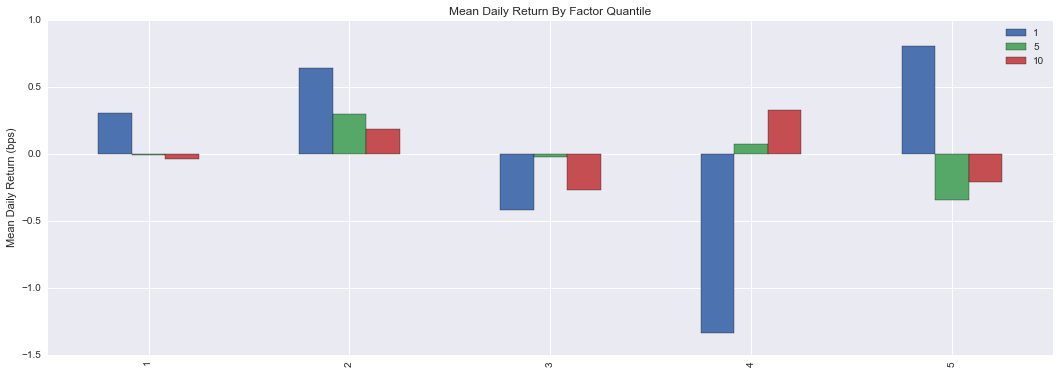

In [99]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_by_q);

By looking at the mean daily return by quantile we can get a real look at how well the factor differentiates forward returns across the signal values. Obviously we want securities with a better signal to exhibit higher returns. For a good factor we'd expect to see negative values in the lower quartiles and positive values in the upper quantiles.

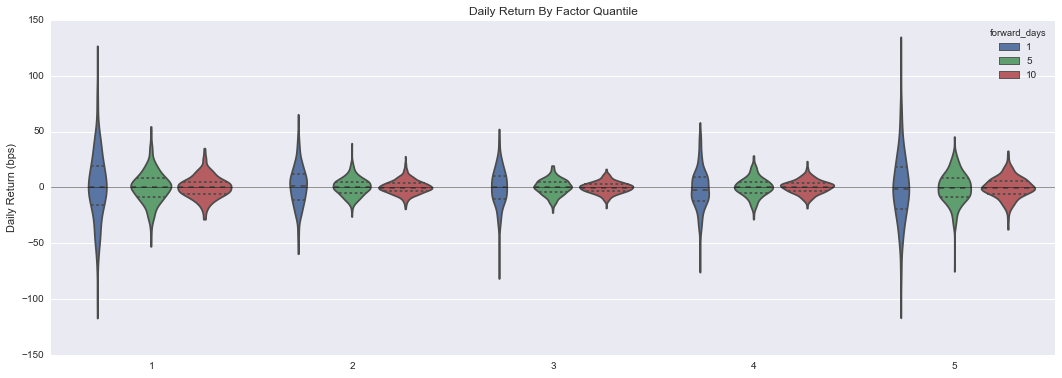

In [100]:
alphalens.plotting.plot_quantile_returns_violin(mean_return_by_q_daily);

This violin plot is similar to the one before it but shows more information about the underlying data. It gives a better idea about the range of values, the median, and the inter-quartile range. What gives the plots their shape is the application of a probability density of the data at different values.

In [101]:
quant_return_spread, std_err_spread = alphalens.performance.compute_mean_returns_spread(mean_return_by_q_daily, 5, 1, std_err)

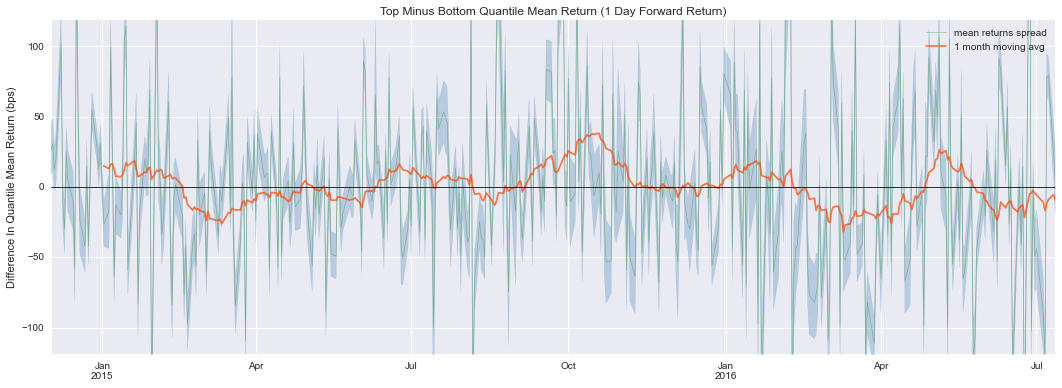

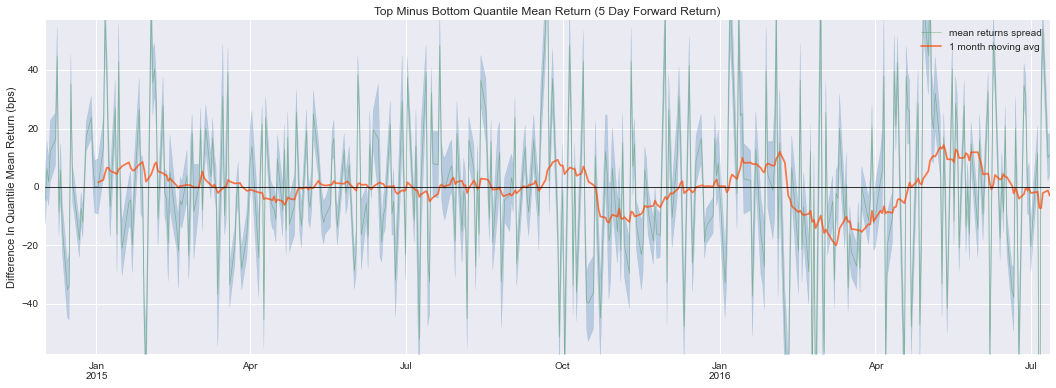

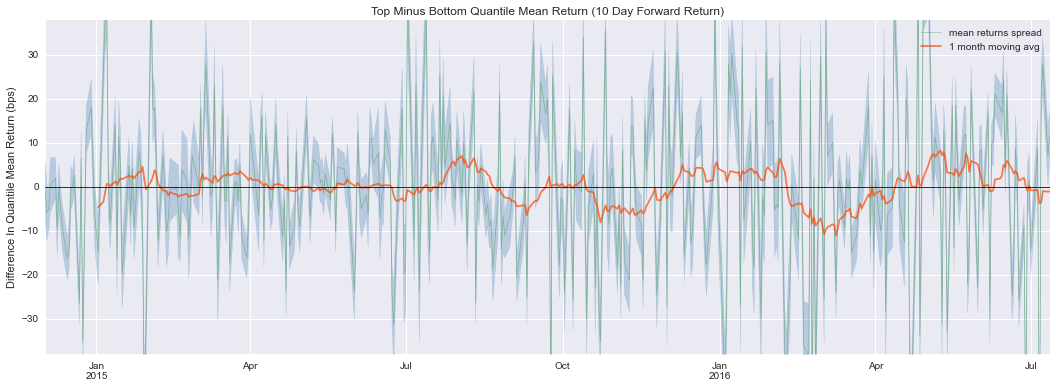

In [102]:
alphalens.plotting.plot_mean_quantile_returns_spread_time_series(quant_return_spread, std_err_spread);

This rolling forward returns spread graph allows us to look at the raw spread in basis points between the top and bottom quantiles over time. The green line is the daily returns spread while the orange line is a 1 month average to smooth the data and make it easier to visualize.

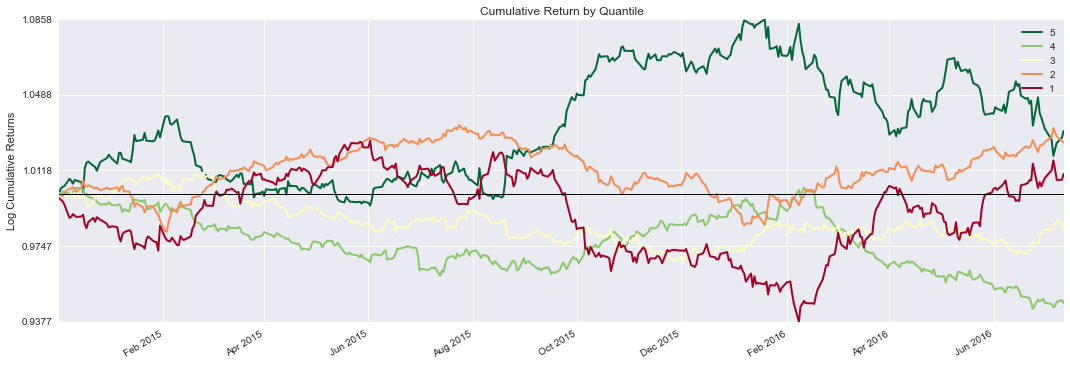

In [103]:
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q_daily);

By looking at the cumulative returns by factor quantile we can get an intuition for which quantiles are contributing the most to the factor and at what time. Ideally we would like to see a these curves originate at the same value on the left and spread out like a fan as they move to the right through time, with the higher quantiles on the top.

In [104]:
ls_factor_returns = alphalens.performance.factor_returns(factor, forward_returns)

In [105]:
ls_factor_returns.head()

,1,5,10
date,,,
2014-12-02,0.000532,-0.000467,-0.000182
2014-12-03,0.000919,0.000369,-0.000189
2014-12-04,0.000540,-0.000311,-0.000279
2014-12-05,0.000213,0.000577,-0.000055
2014-12-08,0.003294,0.000475,-0.000149


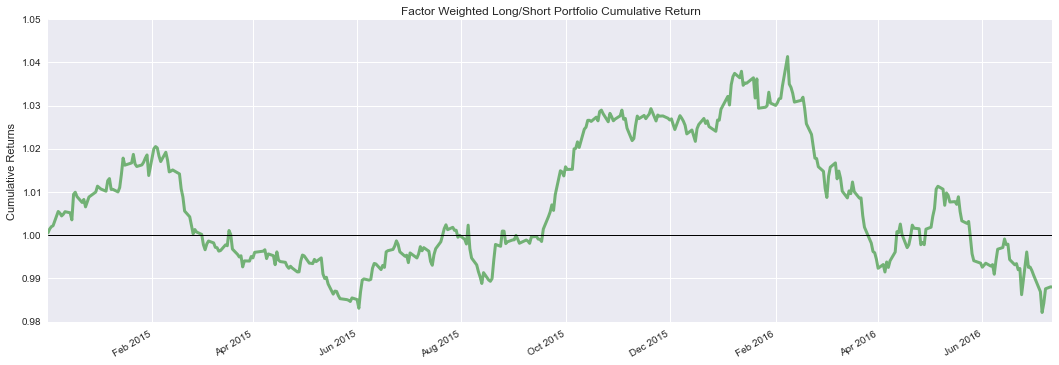

In [106]:
alphalens.plotting.plot_cumulative_returns(ls_factor_returns[1]);

While looking at quantiles is important we must also look at the factor returns as a whole. The cumulative factor long/short returns plot lets us view the combined effects overtime of our entire factor.

In [107]:
alpha_beta = alphalens.performance.factor_alpha_beta(factor, forward_returns,
                                                     factor_daily_returns=ls_factor_returns)

In [108]:
alpha_beta

,1,5,10
Ann. alpha,-0.005776,0.001918,0.002112
t-stat(alpha),0.227938,0.167482,0.263385
beta,-0.031045,-0.047789,-0.033460


A very important part of factor returns analysis is determing the alpha, and how significant it is. Here we surface the annualized alpha, beta, and t-stat for the alpha.

# Information Analysis

Information Analysis is a way for us to evaluate the predicitive value of a factor without the confounding effects of transaction costs. The main way we look at this is through the Information Coefficient (IC).

To learn more about the Information Coefficient and Spearman Rank Correlation check out the [Spearman Rank Correlation lecture](https://www.quantopian.com/lectures#Spearman-Rank-Correlation) from the Quantopian Lecture Series.

In [109]:
ic = alphalens.performance.factor_information_coefficient(factor, forward_returns)

In [110]:
ic.head()

,1,5,10
date,,,
2014-12-02,0.039401,-0.049919,-0.048165
2014-12-03,0.127923,0.101898,-0.026488
2014-12-04,0.055693,-0.067141,-0.090598
2014-12-05,0.029076,0.102585,0.027034
2014-12-08,0.138587,0.031634,-0.029724


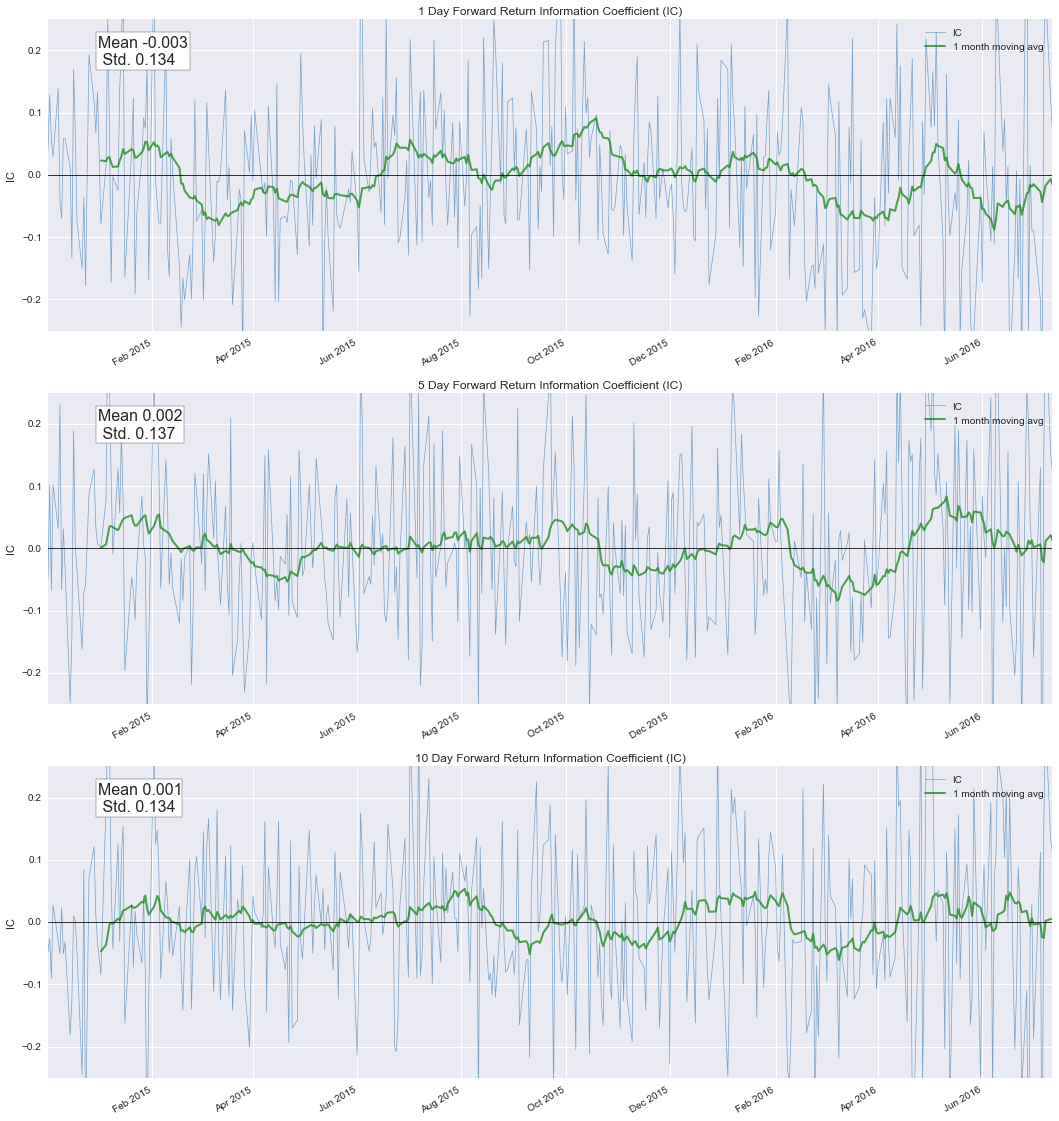

In [111]:
alphalens.plotting.plot_daily_ic_ts(ic);

By looking at the IC each day we can understand how theoretically predicitive our factor is overtime. We like our mean IC to be high and the standard deviation, or volatility of it, to be low. We want to find consistently predictive factors.

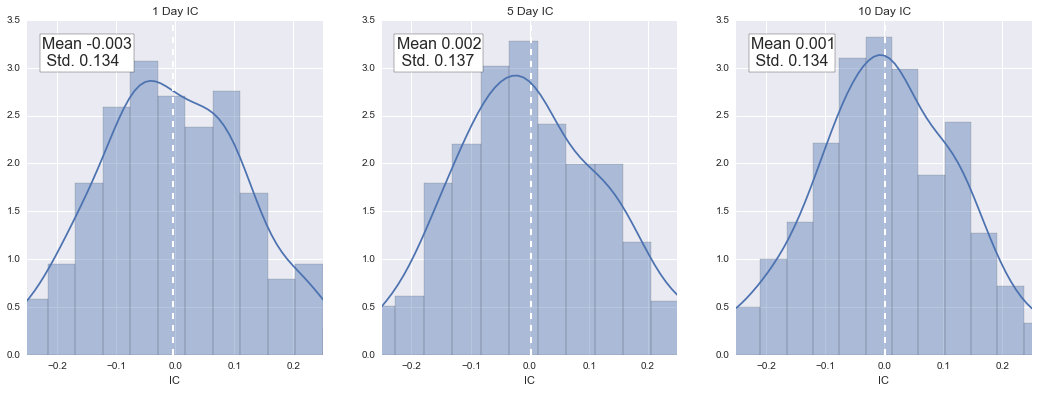

In [112]:
alphalens.plotting.plot_daily_ic_hist(ic);

Looking at a histogram of the daily IC values can indicate how the factor behaves most of the time, where the likely IC values will fall, it also allows us to see if the factor has fat tails.

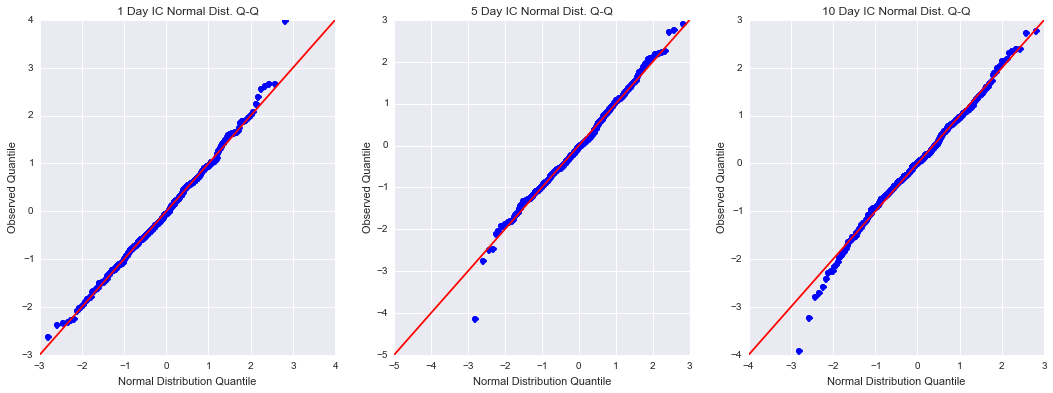

In [113]:
alphalens.plotting.plot_daily_ic_qq(ic);

These Q-Q plots show the difference in shape between the distribution of IC values and a normal distribution. This is especially helpful in seeing how the most extreme values in the distribution affect the predicitive power.

In [114]:
mean_monthly_ic = alphalens.performance.mean_information_coefficient(factor, forward_returns, by_time='M')

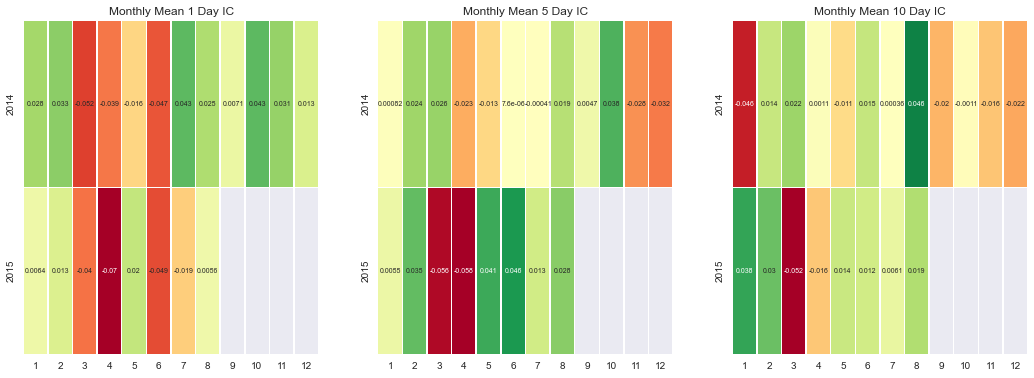

In [115]:
alphalens.plotting.plot_monthly_ic_heatmap(mean_monthly_ic);

By displaying the IC data in heatmap format we can get an idea about the consistency of the factor, and how it behaves during different market regimes/seasons.

# Turnover Analysis

Turnover Analysis gives us an idea about the nature of a factor's makeup and how it changes.

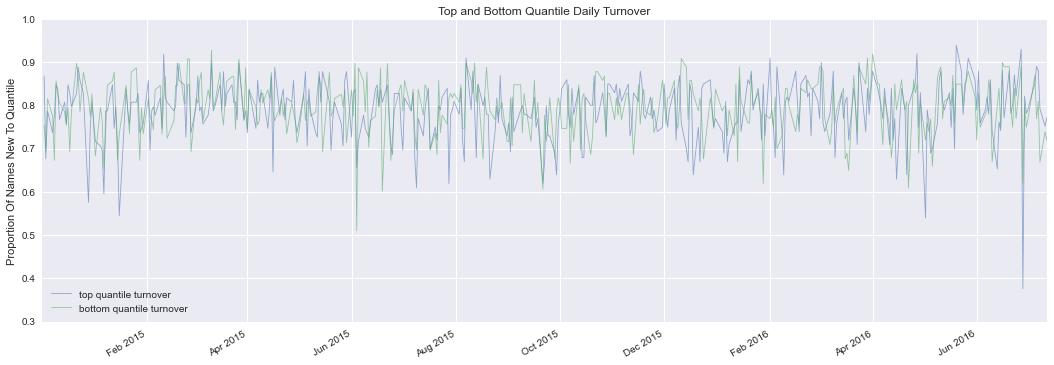

In [116]:
alphalens.plotting.plot_top_bottom_quantile_turnover(quantized_factor);

Factor turnover is important as it indicates the incorporation of new information and the make up of the extremes of a signal. By looking at the new additions to the sets of top and bottom quantiles we can see how much of this factor is getting remade everyday.

In [117]:
factor_autocorrelation = alphalens.performance.factor_rank_autocorrelation(factor, time_rule='D')

In [118]:
factor_autocorrelation.head()

date
2014-12-02         NaN
2014-12-03    0.004198
2014-12-04    0.163807
2014-12-05   -0.003751
2014-12-08    0.008760
dtype: float64

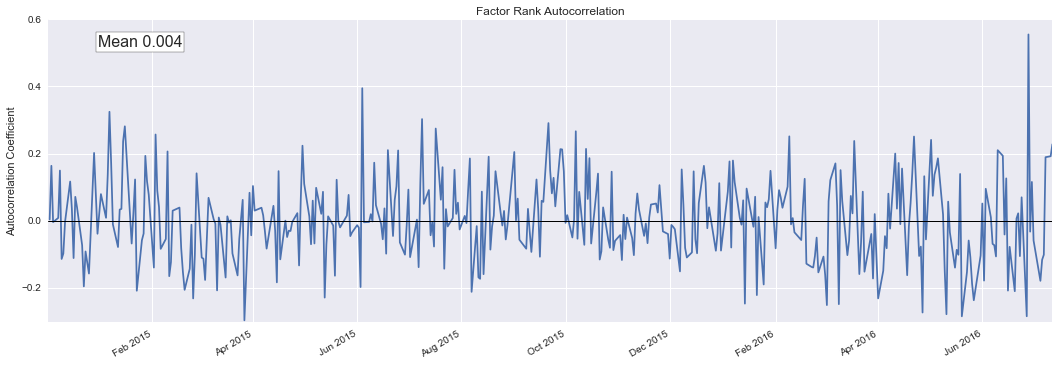

In [119]:
alphalens.plotting.plot_factor_rank_auto_correlation(factor_autocorrelation);

The autocorrelation of the factor indicates to us the persistence of the signal itself.

# Sectorwise

Many of the plots in Alphalens can be viewed on their own by sector if sector information is provided.

In [120]:
ic_by_sector = alphalens.performance.mean_information_coefficient(factor, forward_returns, by_sector=True)

In [121]:
ic_by_sector.head()

,1,5,10
sector,,,
Consumer Discretionary,0.001302,0.003150,-0.004553
Consumer Staples,-0.002052,-0.004956,0.000585
Energy,0.021319,0.007647,0.015788
Financials,0.008801,0.023682,0.022536
Health Care,-0.005348,-0.015582,-0.014392


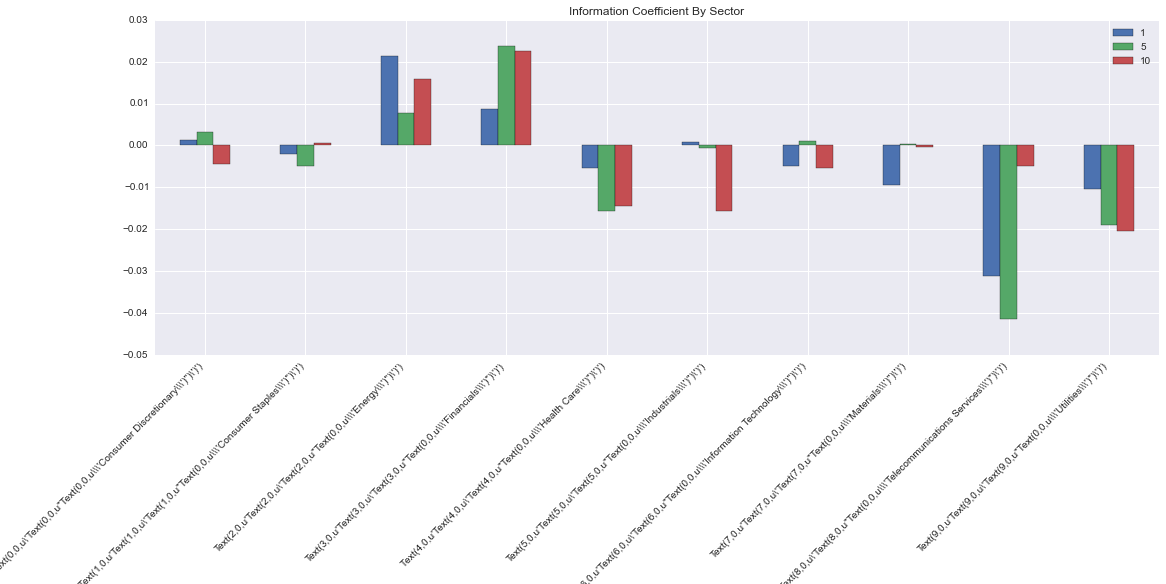

In [122]:
alphalens.plotting.plot_ic_by_sector(ic_by_sector);

In [123]:
mean_return_quantile_sector, mean_return_quantile_sector_err = alphalens.performance.mean_return_by_quantile(quantized_factor, 
                                                                            forward_returns, by_sector=True)

In [124]:
mean_return_quantile_sector.head()

1         5         10
sector                 quantile                              
Consumer Discretionary 1        -0.000053 -0.000029 -0.000042
                       2         0.000062  0.000061  0.000039
                       3        -0.000051 -0.000109  0.000008
                       4        -0.000195  0.000042  0.000015
                       5         0.000244  0.000038 -0.000021

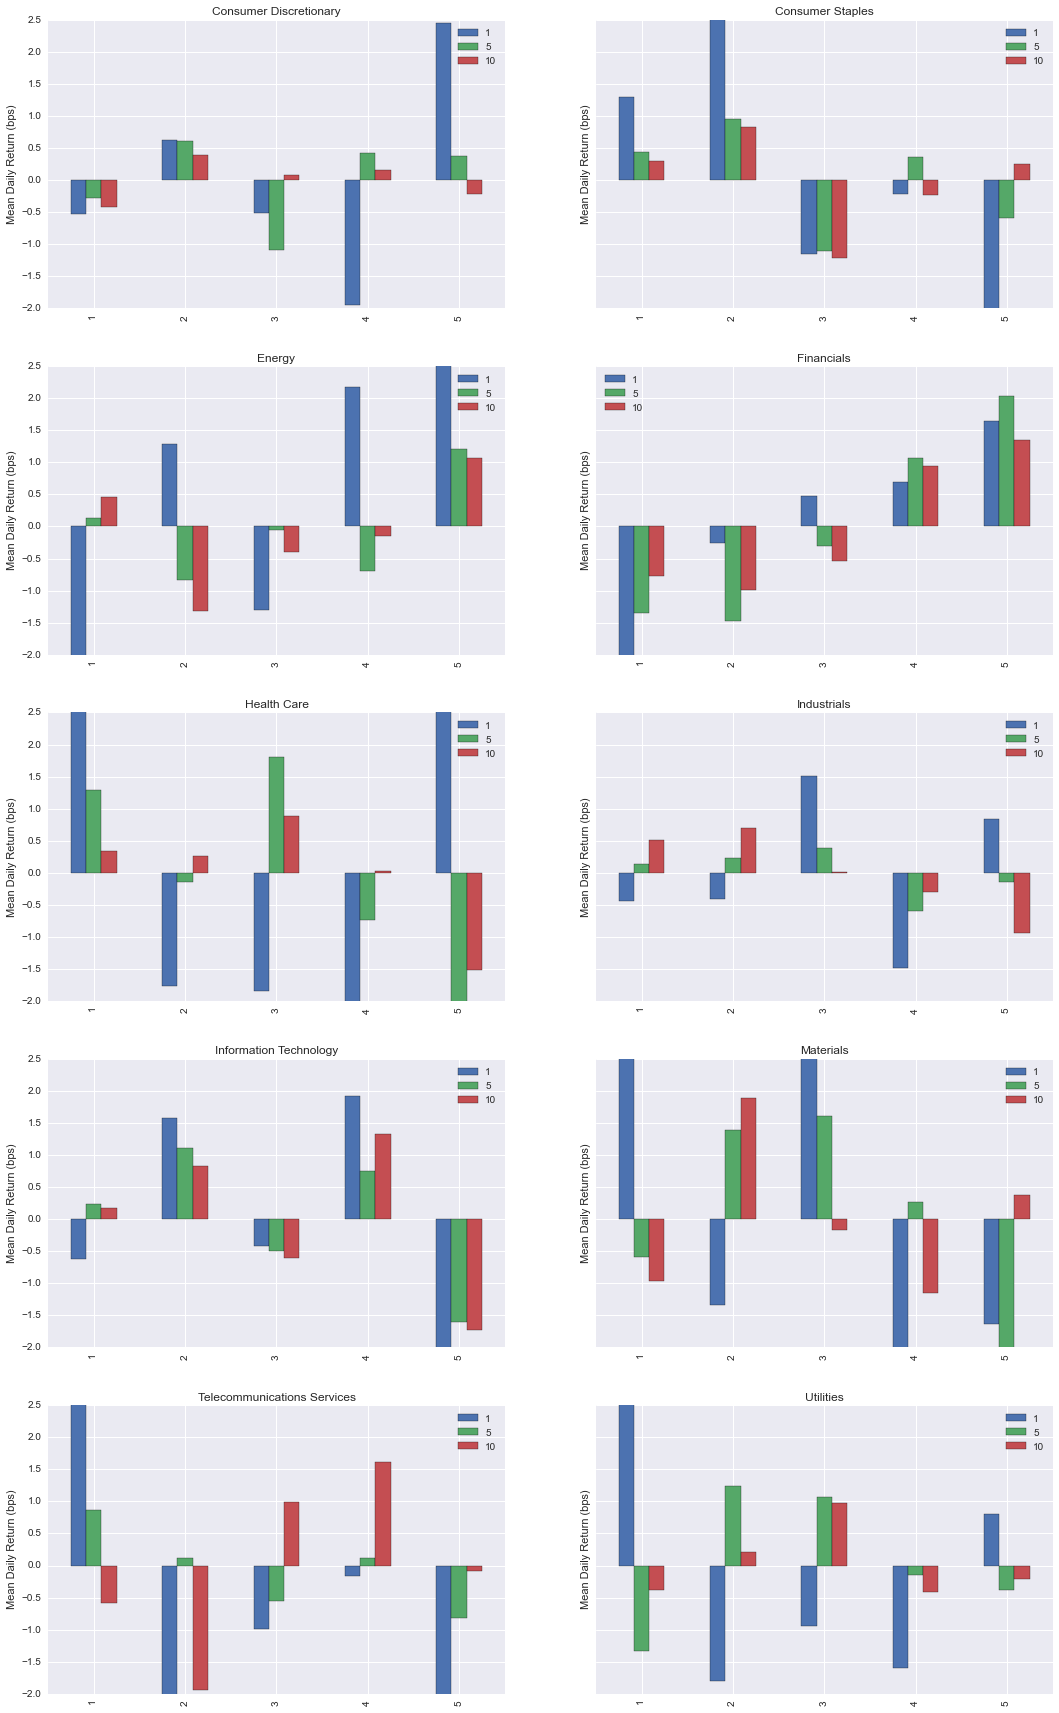

In [ ]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_quantile_sector, by_sector=True);

# The Whole Thing

The factor tear sheet is the main interface to Alphalens. By passing the factor data and pricing you can analyze all of the above statistics and plots at once.

In [ ]:
alphalens.tears.create_factor_tear_sheet(momentum_factor, pricing, sectors=ticker_sector,
                                         sector_names=sector_names, days=(1, 5, 10))

Returns Analysis


,1,5,10
Ann. alpha,-0.003,0.003,0.002
t-stat(alpha),0.102,0.228,0.303
beta,-0.033,-0.048,-0.033
Mean Daily Return Top Quantile (bps),0.788,-0.347,-0.210
Mean Daily Return Bottom Quantile (bps),0.126,-0.042,-0.055
Mean Daily Spread (bps),0.666,-0.302,-0.156


Information Analysis


,1,5,10
IC Mean,-0.003,0.002,0.001
IC Std.,0.134,0.137,0.134
t-stat(IC),-0.477,0.356,0.180
p-value(IC),0.634,0.722,0.857
IC Skew,0.220,0.043,-0.217
IC Kurtosis,0.262,0.404,0.626
Ann. IR,-0.376,0.281,0.142


Turnover Analysis


,Top Quantile,Bottom Quantile
Mean Turnover,0.788,0.796


,
Mean Factor Rank Autocorrelation,0.004
